In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from data import read_data
# test linear dt
from lr_mvdt.main import build_tree as sklr_odt
from rs_mvdt.main import build_tree as rs_odt
import matplotlib.pyplot as plt
import numpy as np
from dt_common.prediction import predict, print_model, print_tree, print_model_depth
from sklearn.tree import DecisionTreeClassifier
import random

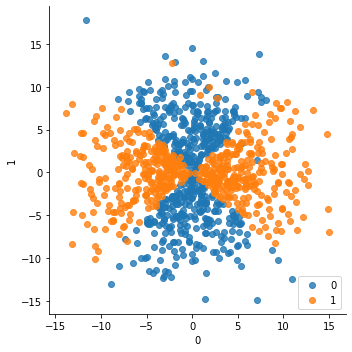

In [2]:
loc = 'data/'
dataset_names = ['circle', 'linear_shape', 'moon', 'triangle', 'weight-height', 'x_rotate_shape', 'x_shape',
                 '024f2liris', '124f2liris', '104f2liris', 'diabetes', 'ionosphere',
                 '100D_20ng_CG_RM_k1_test', '100D_20ng_CG_RM_k1_train', '75D_20ng_CG_RM_k1_train']
algo = ['logit', 'perceptron', 'linearsvc', 'svc']
train_data, df = read_data(loc+dataset_names[6]+'.csv')
# test_data = read_data(loc+dataset_names[-2]+'.csv')

In [64]:
# train_data[0][:5]
# selecting specific columns data
train_data[0][:,[0,1]]

array([[ 9.50557392,  7.75774298],
       [ 2.80599443, -0.52969914],
       [-4.29389655, -5.04315039],
       ...,
       [ 5.81946338,  6.53478198],
       [-7.9228335 ,  5.16028621],
       [ 2.35916572, -5.2257855 ]])

In [54]:
# train_data[0][:,[1,2]]

In [65]:
sklr_model = sklr_odt(train_data, 1000, algo[0], noOfFeature=2)

total rows: 1000, left_rows: 0, right_rows: 1000, epochs: 1000, algo: logit, depth: 0, count: 0, idx: [0, 1], question: [ 0.0129003   0.00775233 -1.41635744]
total rows: 1000, left_rows: 0, right_rows: 1000, epochs: 1000, algo: logit, depth: 0, count: 1, idx: [0, 1], question: [ 0.0129003   0.00775233 -1.41635744]
total rows: 1000, left_rows: 0, right_rows: 1000, epochs: 1000, algo: logit, depth: 0, count: 2, idx: [0, 1], question: [ 0.0129003   0.00775233 -1.41635744]
total rows: 1000, left_rows: 0, right_rows: 1000, epochs: 1000, algo: logit, depth: 0, count: 3, idx: [0, 1], question: [ 0.0129003   0.00775233 -1.41635744]
total rows: 1000, left_rows: 0, right_rows: 1000, epochs: 1000, algo: logit, depth: 0, count: 4, idx: [0, 1], question: [ 0.0129003   0.00775233 -1.41635744]
total rows: 1000, left_rows: 0, right_rows: 1000, epochs: 1000, algo: logit, depth: 0, count: 5, idx: [0, 1], question: [ 0.0129003   0.00775233 -1.41635744]
total rows: 1000, left_rows: 0, right_rows: 1000, ep

In [ ]:
print_model(sklr_model)

Help on function build_tree in module rs_mvdt.main:

build_tree(rows, epochs, min_point=2, max_depth=4, depth=0, noOfFeature=2)



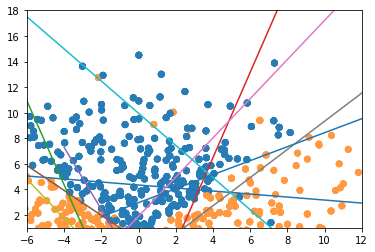

In [74]:
rs_model = rs_odt(train_data, 500, 5, 3, noOfFeature=2)
help(rs_odt)

In [77]:
# on training 

y_pred = predict(train_data[0], rs_model)
# y_pred = clf.predict(train_data[0])
print(classification_report(train_data[-1], y_pred, labels=[0, 1]))
print(accuracy_score(train_data[-1], y_pred))
print(confusion_matrix(train_data[-1], y_pred))

#"""Result on weight_hieght data set very bad so try to combine lr and generate tree here"""

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       491
           1       0.95      0.94      0.94       509

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000

0.944
[[467  24]
 [ 32 477]]


In [46]:
def build_tree(rows, min_point, max_depth=0):
    if max_depth == 0:
        tree = DecisionTreeClassifier(min_samples_leaf=min_point, criterion="gini",
                                      random_state=random.randint(10, 999999))
    else:
        tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_point, criterion="gini",
                                      random_state=random.randint(10, 999999))
    tree.fit(rows[0], rows[1])
    return tree


In [67]:
cart= build_tree(train_data, 2, 2)

In [68]:
cart.score(train_data[0], train_data[1])

0.876

In [12]:
cart.tree_

In [84]:
2**4

16

In [ ]:
help(cart.score)

In [10]:
def meshgridcontour(X, Y, model):
    from matplotlib.colors import ListedColormap
    h = .02  # step size in the mesh

    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    fig, ax = plt.subplots()
    Z = np.array(predict(np.c_[xx.ravel(), yy.ravel()], model))
    
    
    
    
     # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#     ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=cm_bright)
    # and testing points
#     ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

    
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)   
     # Put the result into a color plot
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=cm_bright,
               edgecolors='white', s=30)
    # and testing points
#     ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
#                alpha=0.6, edgecolors='black', s=25)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title("Classifier name")
#     figure.subplots_adjust(left=.02, right=.98)
    plt.show()

In [ ]:
meshgridcontour(train_data[0], train_data[1], rs_model)

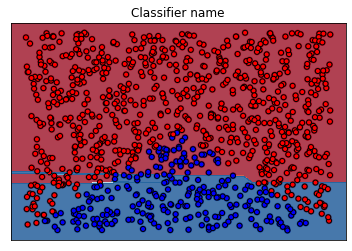

In [151]:
meshgridcontour(train_data[0], train_data[1], sklr_model)

In [80]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    # for sklearn models      
#     labels = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # my ODT 
    labels = np.array(predict(np.c_[xx.ravel(), yy.ravel()], model))
    

    
    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    # my ODT
    train_labels = predict(X, model)
#     sklearn
#     train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)

    return fig, ax

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1cb58228248>)

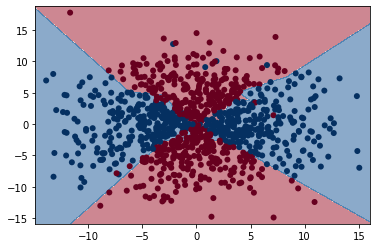

In [82]:
plot_decision_boundary(train_data[0], train_data[1], rs_model, cmap='RdBu')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x16fe0700408>)

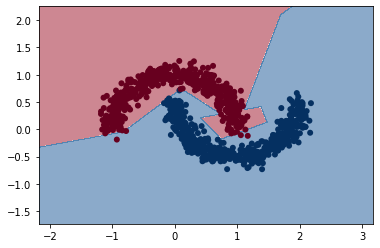

In [122]:
plot_decision_boundary(train_data[0], train_data[1], rs_model, cmap='RdBu')

In [170]:
def plot_data(inputs,targets,weights):
    # fig config
#     plt.figure(figsize=(8,8))
    plt.grid(True)

    #plot input samples(2D data points) and i have two classes. 
    #one is +1 and second one is -1, so it red color for +1 and blue color for -1
    for input,target in zip(inputs,targets):
        plt.plot(input[0],input[1],'ro' if (target == 1.0) else 'bo')

    # Here i am calculating slope and intercept with given three weights
    for i in np.linspace(np.amin(inputs[:,:1]),np.amax(inputs[:,:1])):
        theta = weights.reshape(inputs.shape[1] + 1, 1)
    
        # Ploting Line, decision boundary
        theta_f = list(weights.flat)

        x1_line = np.arange(int(round(inputs.min())), int(round(inputs[0].max())), 0.1)
        x2_line = (-theta_f[2] - theta_f[0] * x1_line) / theta_f[1]
    
#         x2_line = - (theta_f[2] + np.dot(theta_f[0], x1_line)) / theta_f[1]
        plt.plot(x1_line, x2_line, label='Decision Boundary')
#     plt.autoscale

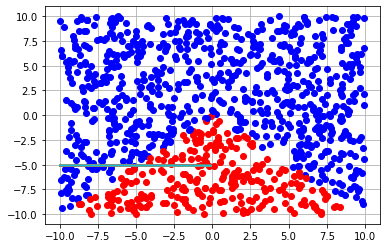

In [171]:
plot_data(train_data[0], train_data[1], sklr_model.question)

Sample output records


Text(0.5, 0.92, 'Iris Dataset reduced by PCA')

Text(0.5, 0, '1st eigenvector')

Text(0.5, 0, '2nd eigenvector')

Text(0.5, 0, '3rd eigenvector')

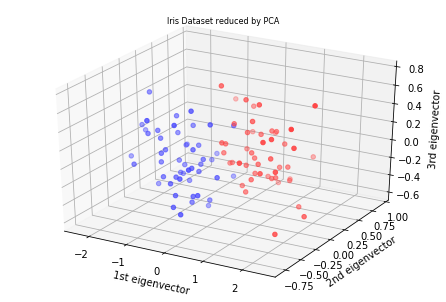

In [67]:
# Reduce the feature dimension from 4 to 3 via PCA
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets, decomposition
iris = datasets.load_iris()

# Run PCA
iris_reduced = decomposition.PCA(n_components=3).fit_transform(train_data[0])
print('Sample output records')
# print(iris_reduced[:5])
# np.savetxt('iris_reduced.csv', iris_reduced, delimiter=',')  # Save for further operation

# Scatter Plot 3D
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title('Iris Dataset reduced by PCA', size=8)
cmap_rgb_dark = ListedColormap(['#FF4444','#44FF44','#4444FF'])
ax.scatter(iris_reduced[:,0], iris_reduced[:,1], iris_reduced[:,2], 
           c=train_data[1], cmap=cmap_rgb_dark)
ax.set_xlabel('1st eigenvector')
ax.set_ylabel('2nd eigenvector')
ax.set_zlabel('3rd eigenvector')
plt.show()

In [99]:
from sklearn.manifold import Isomap

# from sklearn.datasets import load_digits
# digits = load_digits(n_class=6)

# fig, ax = plt.subplots(8, 8, figsize=(6, 6))
# for i, axi in enumerate(ax.flat):
#     axi.imshow(digits.images[i], cmap='binary')
#     axi.set(xticks=[], yticks=[])


In [104]:
digits_data = train_data[0]
digits_target = train_data[1]

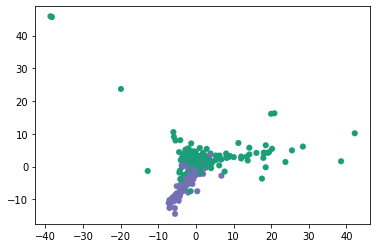

In [105]:
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits_data)
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
                    c=digits_target, cmap=plt.cm.get_cmap('Dark2'))
# plt.colorbar(ticks=range(2), label='digit value')
plt.clim(-0.5, 5.5)

[]

((1000,), (1000, 2))

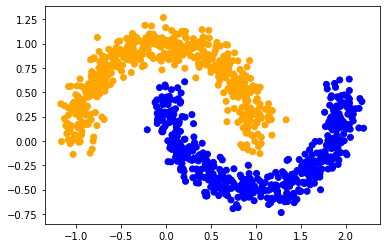

In [17]:
# simple vis
from sklearn import datasets
X, y = datasets.make_moons(n_samples=1000, noise=0.1, random_state=0)
colors = ['blue' if label == 1 else 'orange' for label in y]
plt.scatter(X[:,0], X[:,1], color=colors)
y.shape, X.shape

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear', max_iter=1000).fit

clf.fit(train_data[0], train_data[1])    
theta = np.append(clf.coef_, clf.intercept_)
clf.score(train_data[0], train_data[1])